___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In [ ]:
# If you are using Anaconda, you can create a new environment with use of Anaconda terminal and codes below:
# conda create --name soldier
# conda install -c conda-forge ipykernel scikit-learn "numpy<1.25" pandas shap matplotlib "seaborn==0.12.2" xgboost scikit-plot imbalanced-learn numba jinja2 ipywidgets

In [1]:
# !pip install --upgrade scikit-learn==1.2.2 xgboost==1.7.6
# !pip install pycountry-convert

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models

#### 4. SMOTE
- Apply Imbalance Learning Techniques

#### 5. SHAP
- Apply Feature selection with SHAP


# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from ipywidgets import interact
from IPython.display import clear_output

# for geo info
import pycountry_convert as pc

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

pd.set_option("display.max_rows", None)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
# ## Load the Data Sets
#
# We are loading two CSV files:
# - "ANSUR II FEMALE Public.csv" for female data
# - "ANSUR II MALE Public.csv" for male data
#
# We'll try using the 'latin1' encoding to avoid UnicodeDecodeError.

# Load the female dataset
female_df = pd.read_csv("https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq", encoding='latin1')
print("Female data loaded successfully!")
print("Female data shape:", female_df.shape)

# Load the male dataset with an alternative encoding
male_df = pd.read_csv("https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr", encoding='latin1')
print("\nMale data loaded successfully!")
print("Male data shape:", male_df.shape)

Female data loaded successfully!
Female data shape: (1986, 108)

Male data loaded successfully!
Male data shape: (4082, 108)


## Explore Data

In [4]:
female_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


In [5]:
female_df.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [6]:
male_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


In [7]:
male_df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


# Data preparation

## 1. check two data frames for identical columns

In [8]:
# Check if the two dataframes have exactly the same column names (order matters)
if female_df.columns.equals(male_df.columns):
    print("Both dataframes have the same column names.")
else:
    print("The dataframes have different column names.")
    # Convert columns to sets to ignore order differences
    female_cols = set(female_df.columns)
    male_cols = set(male_df.columns)
    print("Columns only in female_df:", female_cols - male_cols)
    print("Columns only in male_df:", male_cols - female_cols)

The dataframes have different column names.
Columns only in female_df: {'SubjectId'}
Columns only in male_df: {'subjectid'}


 the column names have different capitalization ('SubjectId' vs. 'subjectid'), which makes them technically different even though they refer to the same attribute. fixing the column name...

In [9]:
female_df = female_df.rename(columns={'SubjectId': 'subjectid'})

## 2. concat both data sets

In [10]:
# Combine female_df and male_df vertically
df = pd.concat([female_df, male_df], ignore_index=True)

# Print the shape of the combined dataframe to verify the result
print("Combined dataframe shape:", df.shape)

Combined dataframe shape: (6068, 108)


## 3. Analyze combined dataframe (df) and its columns and values then clean the data

In [11]:
# look at the columns and their types (categorical or numeric) and what kind of measurements we have
df.info(110)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

### check for null values and duplicated rows

In [12]:
missing = df.isnull().sum()
missing_with_values_b_zero = missing[missing > 0]

print("Columns with null values:\n", missing_with_values_b_zero,
      "\n\nTotal duplicate rows:", df.duplicated().sum())

Columns with null values:
 Ethnicity    4647
dtype: int64 

Total duplicate rows: 0


In [13]:
# we drop the column Ethnicity since it contains null values and dropping the null rows would
# be a a waste of a lot of valuable data, so we drop the column
df = df.drop("Ethnicity", axis=1, errors="ignore")
print("The 'Ethnicity' column has been dropped.")
print("dataframe shape:", df.shape)

The 'Ethnicity' column has been dropped.
dataframe shape: (6068, 107)


### Analyze DODRace

,count
DODRace,
1,3792
2,1298
3,679
4,188
6,59
5,49
8,3


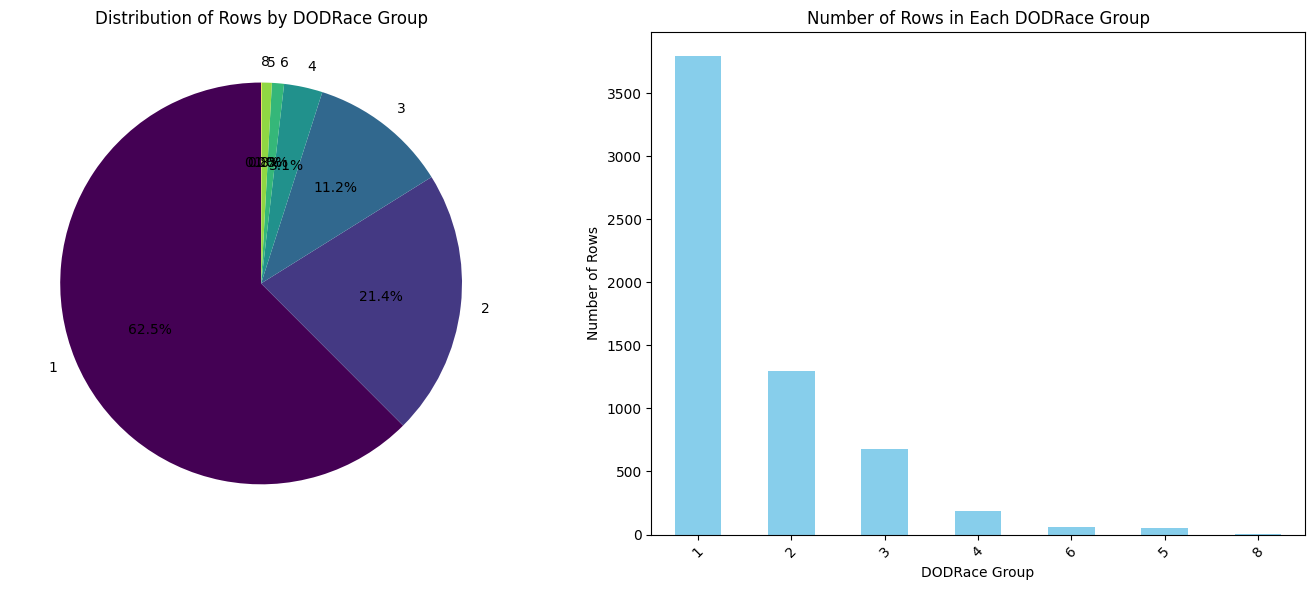

In [14]:
# Calculate the value counts for 'DODRace'
group_counts = df['DODRace'].value_counts()

# Set up the figure and axes for both plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# show group counts
display(group_counts)

# Plot the pie chart
group_counts.plot.pie(
    ax=axes[0],
    autopct='%1.1f%%',
    startangle=90,
    cmap='viridis',
    title='Distribution of Rows by DODRace Group'
)
axes[0].set_ylabel('')  # Hide the y-label for the pie chart

# Plot the bar chart
group_counts.plot.bar(
    ax=axes[1],
    color='skyblue',
    title='Number of Rows in Each DODRace Group'
)
axes[1].set_xlabel('DODRace Group')
axes[1].set_ylabel('Number of Rows')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()



based on the data we can see that some groups (under 500 counts) can be dropped as it is under represented in the data and it would be hard for ML model to utilise this group

### Analyze Categorical Columns

In [15]:
# Get a list of categorical columns (those with dtype 'object' or 'category')
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['Gender',
 'Date',
 'Installation',
 'Component',
 'Branch',
 'PrimaryMOS',
 'SubjectsBirthLocation',
 'WritingPreference']

In [16]:
df.select_dtypes(exclude=[np.number]).head().T

,0,1,2,3,4
Gender,Female,Female,Female,Female,Female
Date,5-Oct-10,5-Oct-10,5-Oct-10,5-Oct-10,5-Oct-10
Installation,Fort Hood,Fort Hood,Fort Hood,Fort Hood,Fort Hood
Component,Regular Army,Regular Army,Regular Army,Regular Army,Regular Army
Branch,Combat Support,Combat Service Support,Combat Service Support,Combat Service Support,Combat Arms
PrimaryMOS,92Y,25U,35D,25U,42A
SubjectsBirthLocation,Germany,California,Texas,District of Columbia,Texas
WritingPreference,Right hand,Right hand,Right hand,Right hand,Right hand


Column 'Gender' has 2 categories.


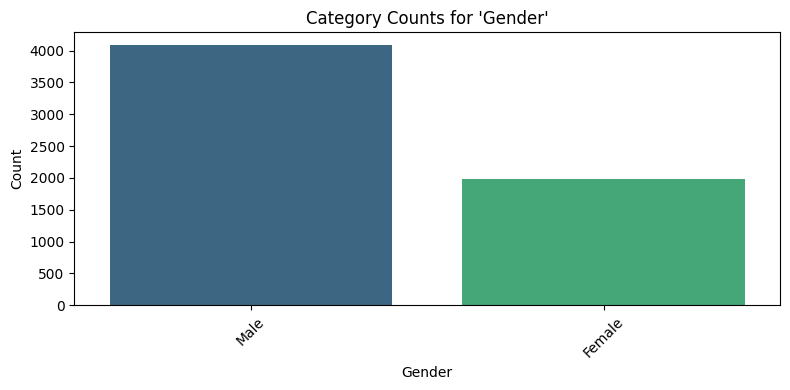

Column 'Date' has 253 categories.


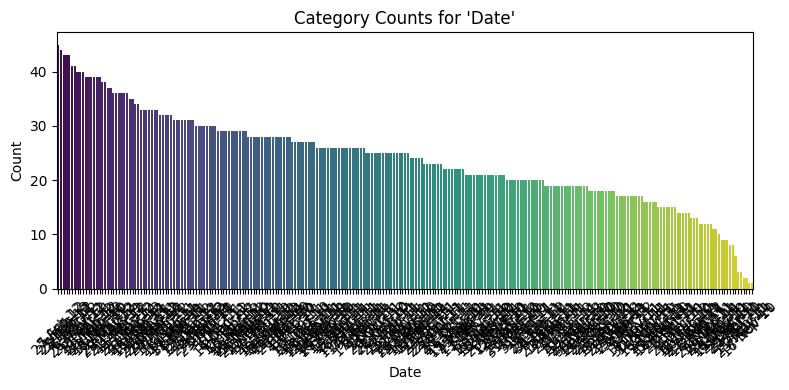

Column 'Installation' has 12 categories.


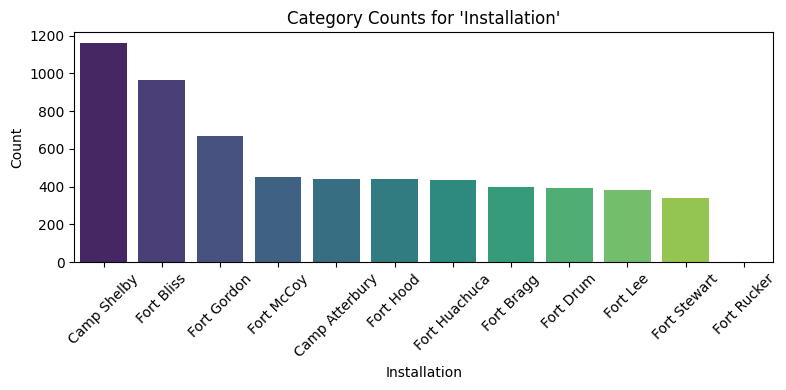

Column 'Component' has 3 categories.


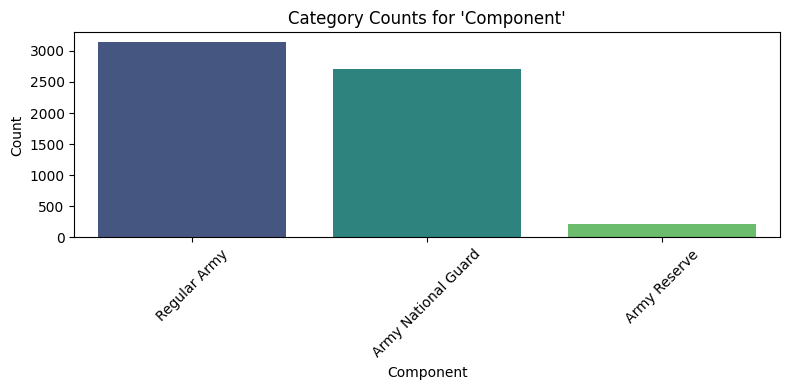

Column 'Branch' has 3 categories.


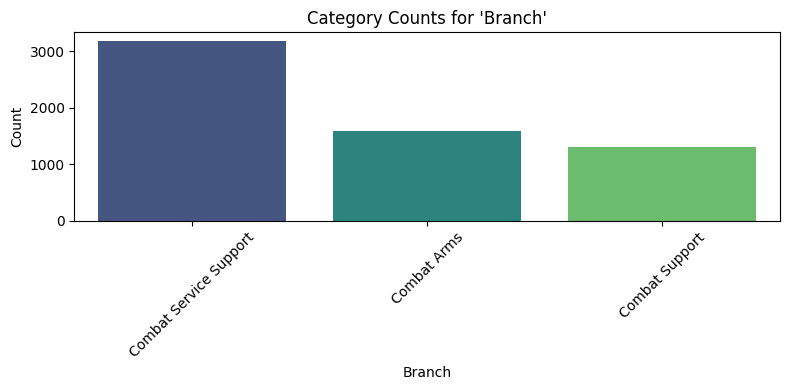

Column 'PrimaryMOS' has 285 categories.


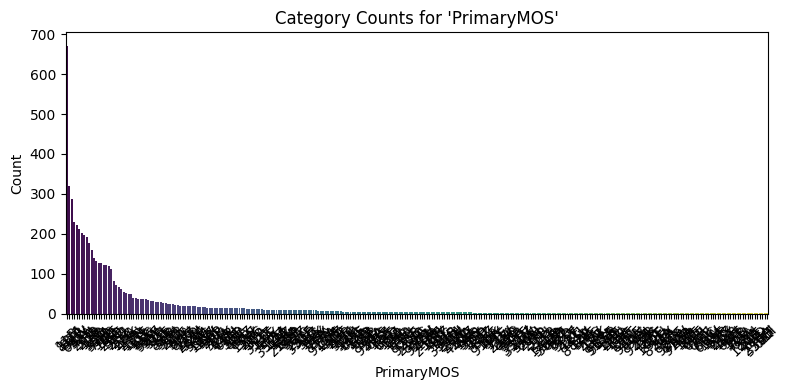

Column 'SubjectsBirthLocation' has 152 categories.


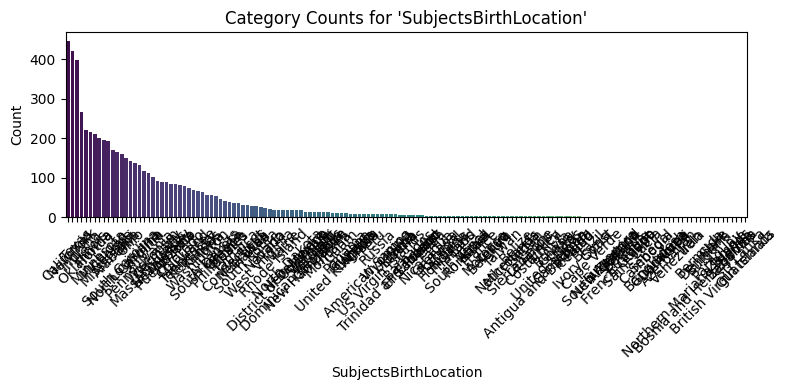

Column 'WritingPreference' has 3 categories.


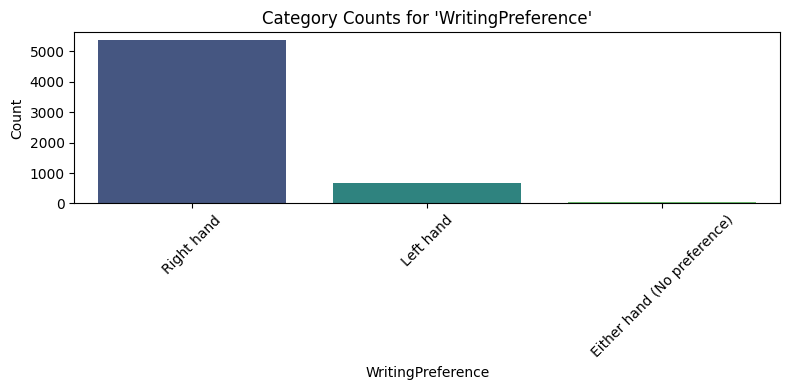

In [17]:
for col in categorical_columns:
    # Count the frequency of each category in the column
    counts = df[col].value_counts()
    num_categories = len(counts)
    print(f"Column '{col}' has {num_categories} categories.")

    # Create a bar chart for the column
    plt.figure(figsize=(8, 4))
    sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette="viridis", legend=False)
    plt.title(f"Category Counts for '{col}'")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

### SubjectsBirthLocation

In [18]:
df.SubjectsBirthLocation.value_counts()

,count
SubjectsBirthLocation,
California,446
New York,420
Texas,397
Indiana,266
Oklahoma,221
Illinois,216
Florida,210
Minnesota,200
Michigan,196


In [19]:
# List of U.S. states and territories (normalized to title case)
us_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
    "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky",
    "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi",
    "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico",
    "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania",
    "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont",
    "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming", "District of Columbia"
]

# Function to convert country to continent
def get_continent(location):
    try:
        country_code = pc.country_name_to_country_alpha2(location, cn_name_format="default")  # Get country code
        continent_code = pc.country_alpha2_to_continent_code(country_code)  # Get continent code

        # Map continent codes to full names
        continent_map = {
            "NA": "North America",
            "SA": "South America",
            "EU": "Europe",
            "AF": "Africa",
            "AS": "Asia",
            "OC": "Oceania"
        }
        return continent_map.get(continent_code, "Others")  # Return continent name
    except:
        return "Unknown"  # Handle unrecognized locations

# Normalize case and apply transformation
df["SubjectsBirthLocation"] = df["SubjectsBirthLocation"].str.title().apply(
    lambda x: x if x in us_states else get_continent(x)
)

# Display updated value counts
print(df["SubjectsBirthLocation"].value_counts())

SubjectsBirthLocation
California        446
New York          420
Texas             397
Indiana           266
North America     248
Oklahoma          221
Illinois          216
Florida           210
Minnesota         200
Michigan          196
Mississippi       194
Georgia           170
Alabama           164
South Carolina    161
North Carolina    149
Europe            146
Asia              143
Ohio              142
Louisiana         137
Pennsylvania      132
Virginia          118
Massachusetts     112
Wisconsin         102
New Jersey         89
Arizona            84
Missouri           84
Colorado           81
Maryland           80
Tennessee          74
Kentucky           69
Washington         66
Kansas             63
South Dakota       56
Iowa               55
Arkansas           54
South America      43
Oregon             42
Unknown            41
Connecticut        36
Africa             35
Nebraska           31
Hawaii             29
Utah               28
West Virginia      26
Oceania   

In [20]:
df["SubjectsBirthLocation"].shape

(6068,)

### SubjectNumericRace

In [21]:
# the column "SubjectNumericRace" seems to be an alternative numerical encoding of race, Numerical (Possibly more detailed), Might include additional classifications, The values might not match exactly with DODRace and may offer more granularity .
# according to data description: both DODRace and SubjectNumericRace relate to race classification but differ in how the data is represented. We need to drop this value to avoid data leakage.
df[["DODRace","SubjectNumericRace"]].head()

,DODRace,SubjectNumericRace
0,2,2
1,3,3
2,1,1
3,2,8
4,1,1


In [22]:
(df.DODRace == df.SubjectNumericRace).sum()

5262

In [23]:
# since we DodRace attribute is the target, We need to drop this value. (SubjectNumericRace) to avoid data leakage.
# and as it give related information
df = df.drop("SubjectNumericRace", axis=1, errors="ignore")
print("The 'SubjectNumericRace' column has been dropped.")
print("dataframe shape:", df.shape)

The 'SubjectNumericRace' column has been dropped.
dataframe shape: (6068, 106)


### check different categorical features against the target value

In [24]:
# map labels to numbers in the data for DODRace column for analysis
# later a transformation will happen to create numerical columns from this using One-Hot Encoding, when needed.
df["DODRace"] = df.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
        4: "Asian",
        5: "Native American",
        6: "Pacific Islander",
        8: "Other",
    }
)

In [25]:
df.groupby(["Component"])["DODRace"].value_counts(normalize=True)

Component            DODRace         
Army National Guard  White               0.685007
                     Black               0.184269
                     Hispanic            0.093427
                     Asian               0.022157
                     Native American     0.008863
                     Pacific Islander    0.006278
Army Reserve         White               0.518182
                     Black               0.236364
                     Hispanic            0.186364
                     Asian               0.040909
                     Pacific Islander    0.013636
                     Native American     0.004545
Regular Army         White               0.580573
                     Black               0.237898
                     Hispanic            0.122611
                     Asian               0.037898
                     Pacific Islander    0.012420
                     Native American     0.007643
                     Other               0.000955
Name: proportion, dtype: float64

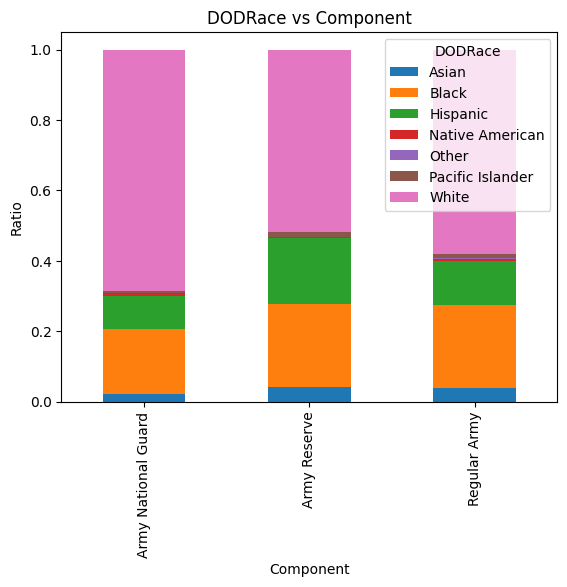

In [26]:
ct = pd.crosstab(df["Component"], df["DODRace"], normalize="index")
ct.plot(kind='bar', stacked=True)
plt.title('DODRace vs Component')
plt.xlabel('Component')
plt.ylabel('Ratio')
plt.show()

### Note:
We can see that the distribution is skewed. In all three components (Army National Guard, Army Reserve, Regular Army), the one category has the highest proportion, which makes the distribution asymmetric.

In [27]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White               0.771995
                                             Black               0.097893
                                             Hispanic            0.091698
                                             Asian               0.022305
                                             Native American     0.011152
                                             Pacific Islander    0.004957
                     Combat Service Support  White               0.643509
                                             Black               0.218947
                                             Hispanic            0.099649
                                             Asian               0.023158
                                             Pacific Islander    0.007719
                                             Native American     0.007018
                     Combat Support          White               0.661765
                                             Black               0.226891
                                             Hispanic            0.077731
                                             Asian               0.018908
                                             Native American     0.010504
                                             Pacific Islander    0.004202
Army Reserve         Combat Arms             White               0.833333
                                             Hispanic            0.166667
                     Combat Service Support  White               0.561644
                                             Hispanic            0.205479
                                             Black               0.164384
                                             Asian               0.047945
                                             Pacific Islander    0.013699
                                             Native American     0.006849
                     Combat Support          Black               0.411765
                                             White               0.397059
                                             Hispanic            0.147059
                                             Asian               0.029412
                                             Pacific Islander    0.014706
Regular Army         Combat Arms             White               0.673602
                                             Hispanic            0.148244
                                             Black               0.122237
                                             Asian               0.033810
                                             Pacific Islander    0.011704
                                             Native American     0.009103
                                             Other               0.001300
                     Combat Service Support  White               0.568933
                                             Black               0.255147
                                             Hispanic            0.120399
                                             Asian               0.036806
                                             Native American     0.008734
                                             Pacific Islander    0.008734
                                             Other               0.001248
                     Combat Support          White               0.511719
                                             Black               0.317708
                                             Hispanic            0.101562
                                             Asian               0.044271
                                             Pacific Islander    0.020833
                                             Native American     0.003906
Name: proportion, dtype: float64

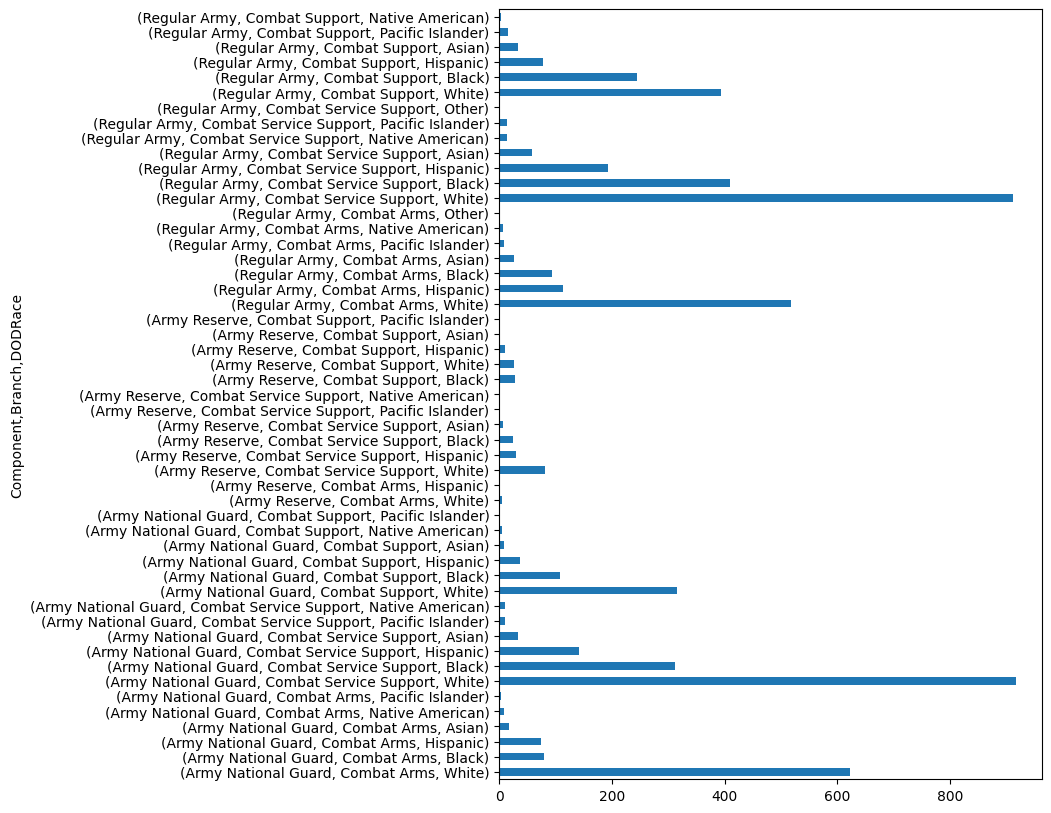

In [28]:
# Grouping the data
grouped_data = df.groupby(["Component", "Branch"])["DODRace"].value_counts()

grouped_data.plot(
    kind="barh", figsize=(7, 10)
);

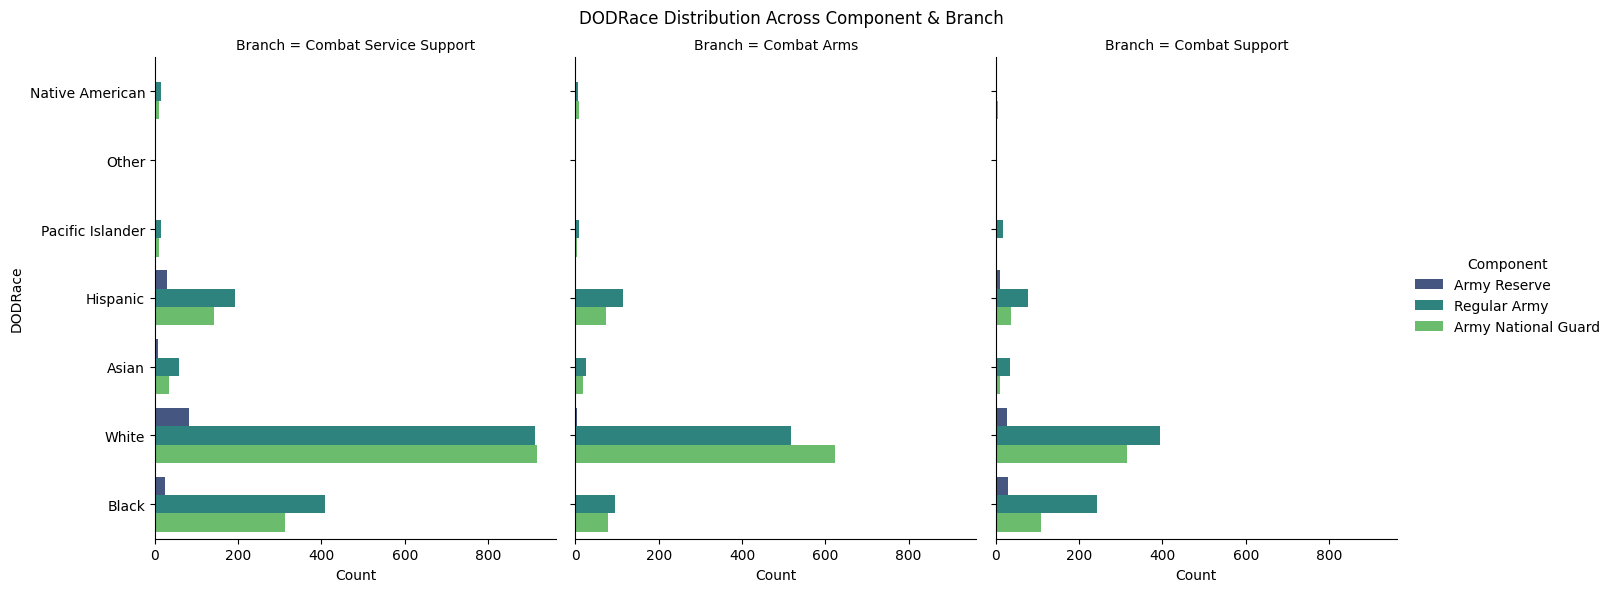

In [29]:
grouped_data.reset_index(name="Count")
df_plot = grouped_data.reset_index(name="Count").sort_values(by="Count", ascending=True)

# Set up FacetGrid to create multiple subplots for Branch
g = sns.catplot(
    data=df_plot,
    x="Count",
    y="DODRace",
    hue="Component",
    col="Branch",  # Separate subplots for each branch
    kind="bar",
    height=6,
    aspect=0.8,
    palette="viridis"
)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("DODRace Distribution Across Component & Branch")
plt.show()

### Note:

We can see that the distribution is very skewed. one category has the highest proportion Based on that it makes sense to drop Component and Branch columns.

### Columns to drop

In [30]:
categorical_columns = df.select_dtypes(include="object")

# Count the number of unique values for each categorical column
unique_counts_df = categorical_columns.nunique().reset_index()
unique_counts_df.columns = ["Feature", "Unique Values"]

unique_counts_df

,Feature,Unique Values
0,Gender,2
1,Date,253
2,Installation,12
3,Component,3
4,Branch,3
5,PrimaryMOS,285
6,SubjectsBirthLocation,57
7,DODRace,7
8,WritingPreference,3


In [31]:
# Drop unwanted columns
columns_to_drop = [
    'subjectid', # random unique values
    'Date', # a lot of values
    'Installation', # no obvious relationship to the dependent variable
    'Weightlbs', 'Heightin', # duplicant and those are info self reported from soldiers.
    'Component','Branch', #  the distribution is very skewed as previously analyized
    'PrimaryMOS' # a lot of values
]
df = df.drop(columns=columns_to_drop, errors='ignore')

# Print a confirmation and list the remaining columns
print("Dropped irrelevant columns:", columns_to_drop)
print("dataframe shape:", df.shape)

categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

Dropped irrelevant columns: ['subjectid', 'Date', 'Installation', 'Weightlbs', 'Heightin', 'Component', 'Branch', 'PrimaryMOS']
dataframe shape: (6068, 98)


['Gender', 'SubjectsBirthLocation', 'DODRace', 'WritingPreference']

### Analyze DODRace

In [32]:
df['DODRace'].value_counts()

,count
DODRace,
White,3792
Black,1298
Hispanic,679
Asian,188
Pacific Islander,59
Native American,49
Other,3


Group counts before filtering:
DODRace
White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: count, dtype: int64

Groups to keep (>= 500 records):
['White', 'Black', 'Hispanic']

Group counts after filtering:
DODRace
White       3792
Black       1298
Hispanic     679
Name: count, dtype: int64

Shape before filtering: (6068, 98)
Shape after filtering: (5769, 98)


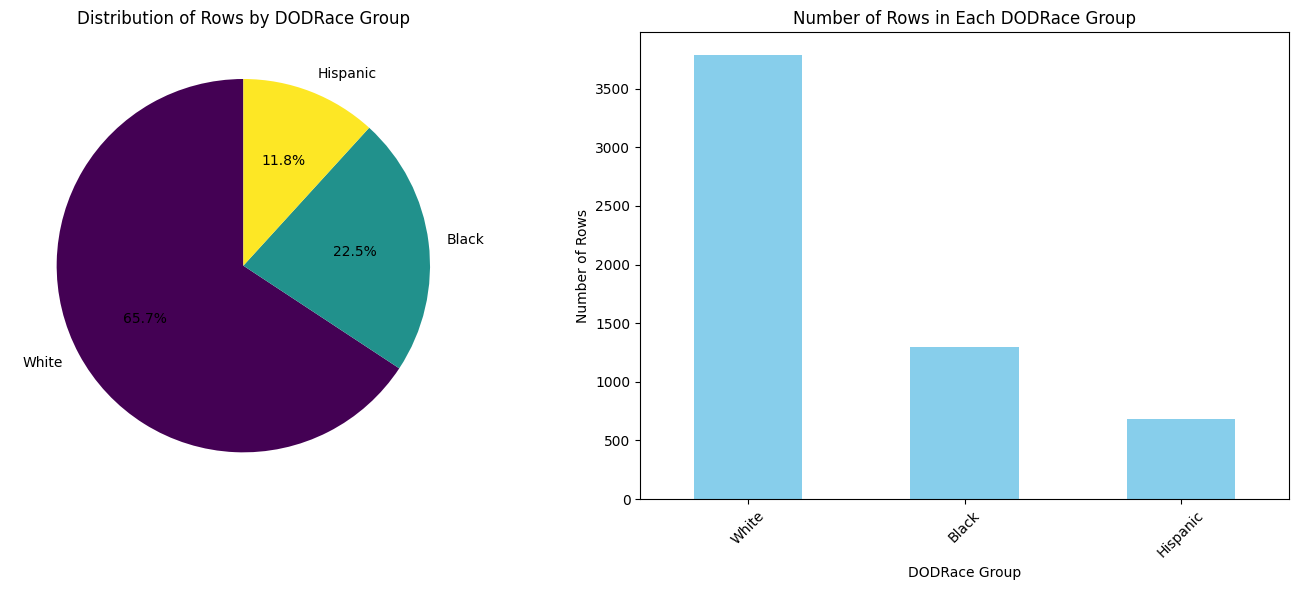

In [33]:
# remove those with fewer than 500 entries,
# as such small groups may not provide sufficient data to train our model effectively.

# First, print the counts per DODRace group before filtering
group_counts = df["DODRace"].value_counts()
print("Group counts before filtering:")
print(group_counts)

# Identify groups that have at least 500 records
groups_to_keep = group_counts[group_counts >= 500].index.tolist()
print("\nGroups to keep (>= 500 records):")
print(groups_to_keep)

# Filter the DataFrame to only include rows where DODRace is in the groups_to_keep list
df_filtered = df[df["DODRace"].isin(groups_to_keep)]

# Print the counts per DODRace group after filtering
print("\nGroup counts after filtering:")
print(df_filtered["DODRace"].value_counts())

# print the shapes before and after filtering
print("\nShape before filtering:", df.shape)
print("Shape after filtering:", df_filtered.shape)

# adapt the new df
df = df_filtered

# Calculate the value counts for 'DODRace'
group_counts = df['DODRace'].value_counts()

# Set up the figure and axes for both plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the pie chart
group_counts.plot.pie(
    ax=axes[0],
    autopct='%1.1f%%',
    startangle=90,
    cmap='viridis',
    title='Distribution of Rows by DODRace Group'
)
axes[0].set_ylabel('')  # Hide the y-label for the pie chart

# Plot the bar chart
group_counts.plot.bar(
    ax=axes[1],
    color='skyblue',
    title='Number of Rows in Each DODRace Group'
)
axes[1].set_xlabel('DODRace Group')
axes[1].set_ylabel('Number of Rows')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## Feature Analysis and Correlation Control

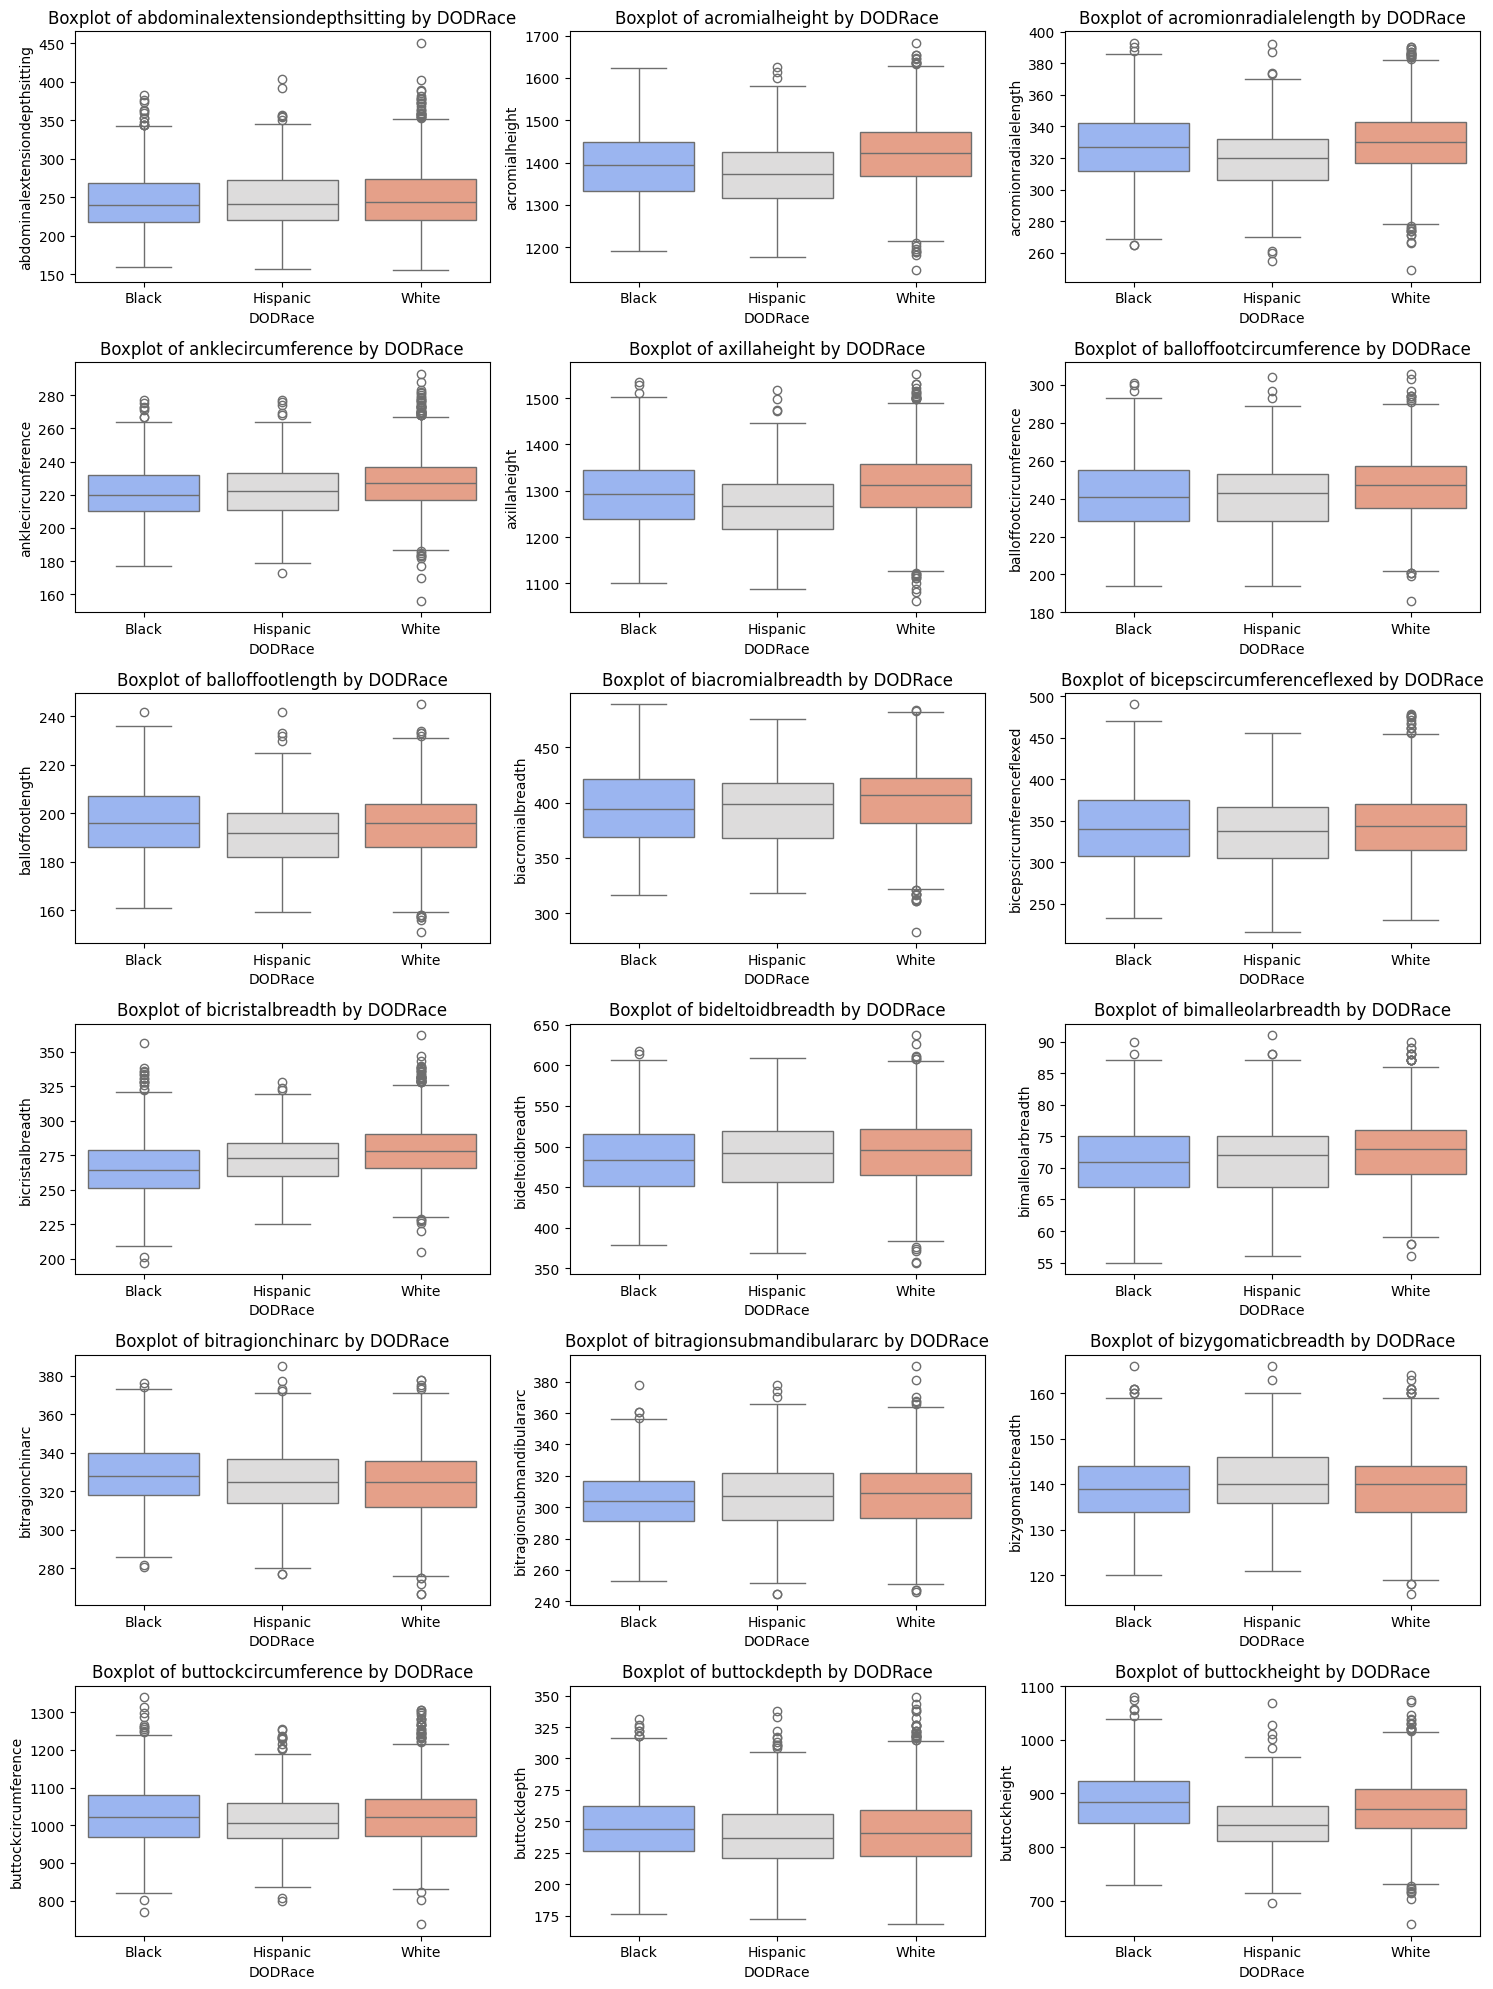

In [34]:
# Create a boxplot for numerical features grouped by 'DODRace'
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))  # Adjust grid size based on number of features
axes = axes.flatten()  # Flatten axes array for easy iteration

# Selecting only numerical columns
numerical_columns = df.select_dtypes(include=["number"]).columns

# Plot boxplots for each numerical column grouped by 'DODRace'
for i, col in enumerate(numerical_columns):
    if i < len(axes):  # Ensure we don't exceed subplot grid
        sns.boxplot(data=df, x="DODRace", y=col, hue="DODRace", ax=axes[i], palette="coolwarm", legend=False)
        axes[i].set_title(f"Boxplot of {col} by DODRace", fontsize=12)
        axes[i].set_xlabel("DODRace")
        axes[i].set_ylabel(col)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


# we can examine each feature against the dependent variable.
# we see a lot of values outside the interquartile Range
# we notice that the size of the interquartile Range is acually wide
# for a lot of features is big which makes it more resistant to outliers.

In [35]:
# Define function to plot joint distribution between two numerical columns
def column_pair(col1, col2):
    clear_output(wait=True)
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed

    sns.jointplot(
        data=df,
        x=col1,
        y=col2,
        kind="hist",  # Creates a 2D histogram
        hue="DODRace",  # Color by 'DODRace'
        palette="Dark2",
        height=8,  # Adjust size
        marginal_kws={"bins": 20}  # Adjust number of bins
    )

    plt.show()  # Ensures only one plot is displayed at a time

# Select only numerical columns
cols = df.select_dtypes(include=["number"]).columns

# Enable interactive selection of column pairs
interact(column_pair, col1=cols, col2=cols)

interactive(children=(Dropdown(description='col1', options=('abdominalextensiondepthsitting', 'acromialheight'…

<function __main__.column_pair(col1, col2)>

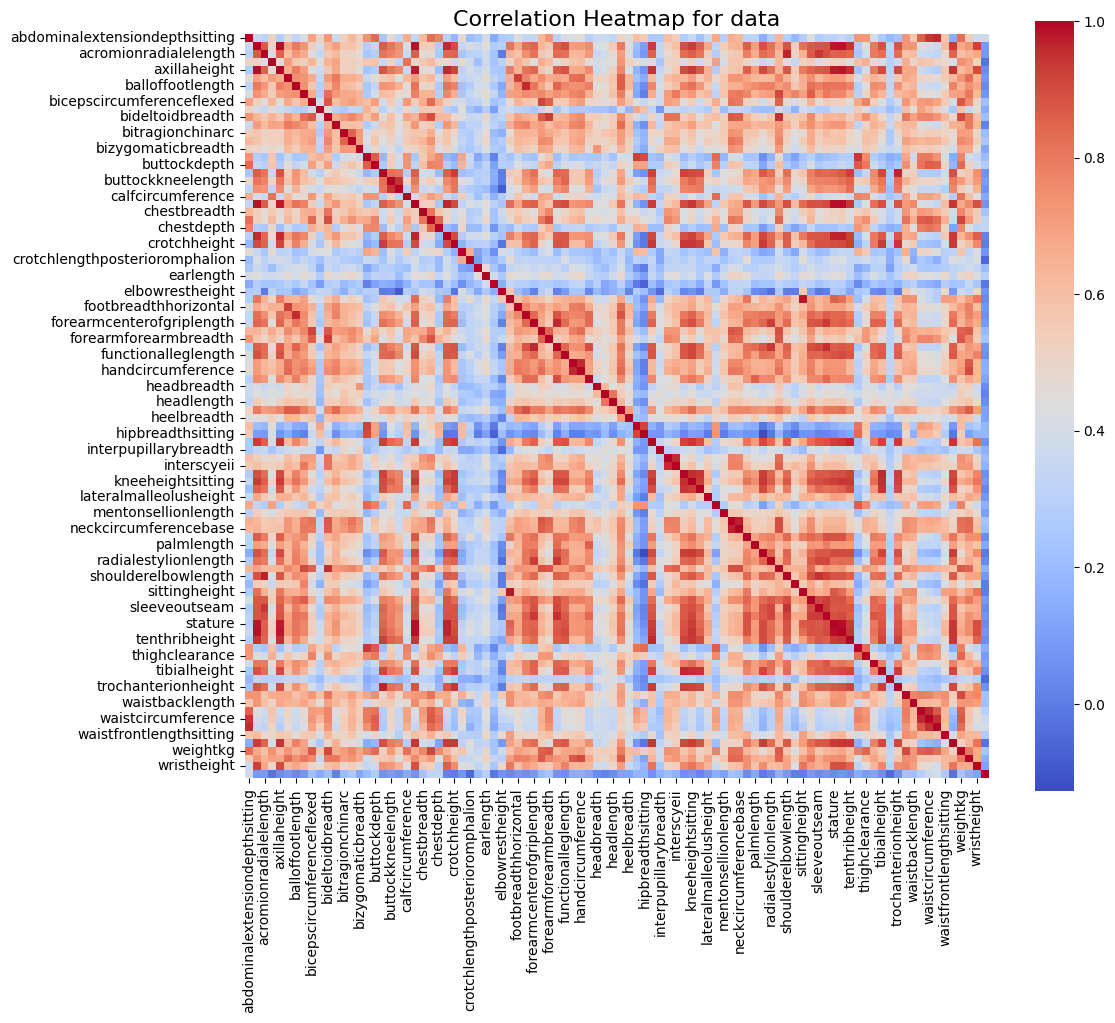

In [36]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=["number"])  # Ensures only numeric data is used

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True)
plt.title(f'Correlation Heatmap for data', fontsize=16)
plt.show()

In [37]:
# find numeric columns that are highly correlated

# Select only numeric columns from df (ignoring non-numeric ones)
df_numeric = df.select_dtypes(include=[np.number])

# Calculate the absolute correlation matrix for numeric columns
corr_matrix = df_numeric.corr().abs()

# Set the correlation threshold
threshold = 0.9

# Get the list of column names from the correlation matrix
cols = corr_matrix.columns

# Initialize a list to store dictionaries for each correlated pair
data = []

# Loop over the upper triangle of the correlation matrix
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        corr_value = corr_matrix.iloc[i, j]
        if corr_value > threshold:
            data.append({
                "Feature1": cols[i],
                "Feature2": cols[j],
                "Correlation": corr_value
            })

# Convert the list of dictionaries into a DataFrame
df_high_corr = pd.DataFrame(data)

print("Highly correlated pairs (correlation > {}):".format(threshold))
df_high_corr.info()

Highly correlated pairs (correlation > 0.9):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Feature1     143 non-null    object 
 1   Feature2     143 non-null    object 
 2   Correlation  143 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.5+ KB


In [38]:
df_high_corr.value_counts("Feature1")

,count
Feature1,
axillaheight,13
cervicaleheight,12
crotchheight,10
acromialheight,10
kneeheightsitting,9
iliocristaleheight,9
chestheight,8
kneeheightmidpatella,7
buttockheight,7


# Note about multicollinearity

There is a multicollinearity issue, but it is not a major concern for logistic regression with regularization or for non-parametric algorithms, which are less sensitive to correlated features.

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [67]:
# df is combined DataFrame and "DODRace" is the target column.
X = df.drop("DODRace", axis=1)
y = df["DODRace"]

# Split the data into training and test sets (stratified on the target)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=6, stratify=y
)

# Identify numeric and categorical columns
numeric_columns = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric columns:", numeric_columns)
print("Categorical columns:", categorical_columns)

# Create a ColumnTransformer that applies:
# - MinMaxScaler to numeric columns (scales them to [0, 1])
# - OneHotEncoder to categorical columns (with drop='first' to avoid multicollinearity)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_columns),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ]
)


Numeric columns: ['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength', '

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

### Helper functions

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 1. Logistic model

In [69]:
y_train.head()

,DODRace
2481,White
5013,White
240,White
4804,Black
3809,Black


### Vanilla Logistic Model

In [70]:
# Build a pipeline that applies the preprocessor and then a Logistic Regression classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=10000))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)


# Optionally, view the shape of the preprocessed training data:
X_train_transformed = preprocessor.transform(X_train)
print("Transformed training data shape:", X_train_transformed.shape)

x = eval_metric(pipeline, X_train, y_train, X_test, y_test)

Transformed training data shape: (4615, 153)
Test_Set
[[236   5  19]
 [  5  80  51]
 [  7  19 732]]
              precision    recall  f1-score   support

       Black       0.95      0.91      0.93       260
    Hispanic       0.77      0.59      0.67       136
       White       0.91      0.97      0.94       758

    accuracy                           0.91      1154
   macro avg       0.88      0.82      0.84      1154
weighted avg       0.90      0.91      0.90      1154


Train_Set
[[ 931   26   81]
 [  35  310  198]
 [  26   54 2954]]
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92      1038
    Hispanic       0.79      0.57      0.66       543
       White       0.91      0.97      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.88      0.81      0.84      4615
weighted avg       0.91      0.91      0.90      4615



### Logistic Model GridsearchCV

In [71]:
# Build a pipeline that applies the preprocessor and then a Logistic Regression classifier.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=10000, solver='liblinear'))
])

# Define the parameter grid for the LogisticRegression hyperparameters.
# 'classifier__C' controls the inverse regularization strength.
# 'classifier__penalty' specifies the type of regularization.
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

# Initialize GridSearchCV with 5-fold cross-validation and use accuracy as the scoring metric.
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Extract the best fitted model
best_pipeline = grid_search.best_estimator_

# Print the best parameters and the corresponding cross-validation accuracy score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2%}".format(grid_search.best_score_))

eval_metric(best_pipeline, X_train, y_train, X_test, y_test)

Best parameters found: {'classifier__C': 10, 'classifier__penalty': 'l2'}
Best cross-validation accuracy: 89.84%
Test_Set
[[239   3  18]
 [  4  82  50]
 [  8  17 733]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.94       260
    Hispanic       0.80      0.60      0.69       136
       White       0.92      0.97      0.94       758

    accuracy                           0.91      1154
   macro avg       0.89      0.83      0.85      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[ 951   20   67]
 [  41  305  197]
 [  31   54 2949]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.80      0.56      0.66       543
       White       0.92      0.97      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.88      0.82      0.84      4615
weighted avg       0.91      0.91      0.91      4615



In [74]:
log_model = {
    "model": best_pipeline,
    "score": grid_search.best_score_,
    "param": grid_search.best_params_
}
log_model

{'model': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                   ['abdominalextensiondepthsitting',
                                                    'acromialheight',
                                                    'acromionradialelength',
                                                    'anklecircumference',
                                                    'axillaheight',
                                                    'balloffootcircumference',
                                                    'balloffootlength',
                                                    'biacromialbreadth',
                                                    'bicepscircumferenceflexed',
                                                    'bicristalbreadth',
                                                    'bideltoidbreadth',
                                                    'bimall

In [75]:
log_model["model"]

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['abdominalextensiondepthsitting',
                                                   'acromialheight',
                                                   'acromionradialelength',
                                                   'anklecircumference',
                                                   'axillaheight',
                                                   'balloffootcircumference',
                                                   'balloffootlength',
                                                   'biacromialbreadth',
                                                   'bicepscircumferenceflexed',
                                                   'bicristalbreadth',
                                                   'bideltoidbreadth',
                                                   'bimalleolarbreadth',
                                                   '...
                                                   'chestbreadth',
                                                   'chestcircumference',
                                                   'chestdepth', 'chestheight',
                                                   'crotchheight',
                                                   'crotchlengthomphalion',
                                                   'crotchlengthposterioromphalion',
                                                   'earbreadth', ...]),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('classifier',
                 LogisticRegression(C=10, max_iter=10000, random_state=42,
                                    solver='liblinear'))])

## 2. SVC

### Vanilla SVC model

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Build a pipeline that applies the preprocessor and then an SVC classifier.
# Here, we set C=1, kernel='rbf', and gamma='scale' (which are common default settings).
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42, C=1, kernel='rbf', gamma='scale'))
])

# Fit the pipeline on the training data.
pipeline.fit(X_train, y_train)

# Predict on the test set.
y_pred = pipeline.predict(X_test)

# Evaluate the model.
eval_metric(pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[232   5  23]
 [  7  51  78]
 [  7   6 745]]
              precision    recall  f1-score   support

       Black       0.94      0.89      0.92       260
    Hispanic       0.82      0.38      0.52       136
       White       0.88      0.98      0.93       758

    accuracy                           0.89      1154
   macro avg       0.88      0.75      0.79      1154
weighted avg       0.89      0.89      0.88      1154


Train_Set
[[ 929   14   95]
 [  38  209  296]
 [  13   18 3003]]
              precision    recall  f1-score   support

       Black       0.95      0.89      0.92      1038
    Hispanic       0.87      0.38      0.53       543
       White       0.88      0.99      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.90      0.76      0.80      4615
weighted avg       0.90      0.90      0.88      4615



###  SVC Model GridsearchCV

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


# Build a pipeline that first preprocesses the data and then fits an SVC classifier.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

# Define the parameter grid for hyperparameter tuning of the SVC.
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],  # Try both linear and RBF kernels.
    'classifier__gamma': ['scale', 'auto', 0.01]     # Options for the RBF kernel; 'gamma' is ignored for linear.
}

# Set up GridSearchCV with 5-fold cross-validation.
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)

# Fit GridSearchCV on the training data.
grid_search.fit(X_train, y_train)

# Extract the best fitted model
best_pipeline = grid_search.best_estimator_

# Output the best parameters and cross-validation accuracy.
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2%}".format(grid_search.best_score_))

# Evaluate the model.
eval_metric(best_pipeline, X_train, y_train, X_test, y_test)

Best parameters found: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best cross-validation accuracy: 89.69%
Test_Set
[[242   1  17]
 [  4  77  55]
 [  9  17 732]]
              precision    recall  f1-score   support

       Black       0.95      0.93      0.94       260
    Hispanic       0.81      0.57      0.67       136
       White       0.91      0.97      0.94       758

    accuracy                           0.91      1154
   macro avg       0.89      0.82      0.85      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[ 944   24   70]
 [  34  303  206]
 [  25   49 2960]]
              precision    recall  f1-score   support

       Black       0.94      0.91      0.93      1038
    Hispanic       0.81      0.56      0.66       543
       White       0.91      0.98      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.89      0.81      0.84      4615
weighted avg       0.91    

In [77]:
svc_model = {
    "model": best_pipeline,
    "score": grid_search.best_score_,
    "param": grid_search.best_params_
}
svc_model

{'model': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                   ['abdominalextensiondepthsitting',
                                                    'acromialheight',
                                                    'acromionradialelength',
                                                    'anklecircumference',
                                                    'axillaheight',
                                                    'balloffootcircumference',
                                                    'balloffootlength',
                                                    'biacromialbreadth',
                                                    'bicepscircumferenceflexed',
                                                    'bicristalbreadth',
                                                    'bideltoidbreadth',
                                                    'bimall

In [78]:
svc_model["model"]

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['abdominalextensiondepthsitting',
                                                   'acromialheight',
                                                   'acromionradialelength',
                                                   'anklecircumference',
                                                   'axillaheight',
                                                   'balloffootcircumference',
                                                   'balloffootlength',
                                                   'biacromialbreadth',
                                                   'bicepscircumferenceflexed',
                                                   'bicristalbreadth',
                                                   'bideltoidbreadth',
                                                   'bimalleolarbreadth',
                                                   '...
                                                   'calfcircumference',
                                                   'cervicaleheight',
                                                   'chestbreadth',
                                                   'chestcircumference',
                                                   'chestdepth', 'chestheight',
                                                   'crotchheight',
                                                   'crotchlengthomphalion',
                                                   'crotchlengthposterioromphalion',
                                                   'earbreadth', ...]),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('classifier', SVC(C=1, kernel='linear', random_state=42))])

## 3. RF

### Vanilla RF Model

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Build a pipeline that applies the preprocessor and then a RandomForestClassifier.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the training data.
pipeline.fit(X_train, y_train)

# Predict on the test set.
y_pred = pipeline.predict(X_test)

# Evaluate the model.
eval_metric(pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[186   2  72]
 [ 15  33  88]
 [ 12  12 734]]
              precision    recall  f1-score   support

       Black       0.87      0.72      0.79       260
    Hispanic       0.70      0.24      0.36       136
       White       0.82      0.97      0.89       758

    accuracy                           0.83      1154
   macro avg       0.80      0.64      0.68      1154
weighted avg       0.82      0.83      0.80      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### RF Model GridsearchCV

In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Build a pipeline that applies the preprocessor and then a RandomForestClassifier.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define a parameter grid for hyperparameter tuning of the RandomForestClassifier.
param_grid = {
    'classifier__n_estimators': [100, 300],
    'classifier__max_depth': [2, 5, 10],
}

# Initialize GridSearchCV with the pipeline, using 5-fold cross-validation and accuracy as the scoring metric.
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)

# Fit GridSearchCV on the training data.
grid_search.fit(X_train, y_train)

# Extract the best fitted model
best_pipeline = grid_search.best_estimator_

# Output the best parameters and best cross-validation accuracy.
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2%}".format(grid_search.best_score_))

# Evaluate the model.
eval_metric(best_pipeline, X_train, y_train, X_test, y_test)

Best parameters found: {'classifier__max_depth': 10, 'classifier__n_estimators': 300}
Best cross-validation accuracy: 82.28%
Test_Set
[[175   1  84]
 [ 11  20 105]
 [  9   6 743]]
              precision    recall  f1-score   support

       Black       0.90      0.67      0.77       260
    Hispanic       0.74      0.15      0.25       136
       White       0.80      0.98      0.88       758

    accuracy                           0.81      1154
   macro avg       0.81      0.60      0.63      1154
weighted avg       0.81      0.81      0.78      1154


Train_Set
[[ 941    0   97]
 [   2  273  268]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      0.91      0.95      1038
    Hispanic       1.00      0.50      0.67       543
       White       0.89      1.00      0.94      3034

    accuracy                           0.92      4615
   macro avg       0.96      0.80      0.85      4615
weighted avg       0.93      0.92      0.91    

In [80]:
rf_model = {
    "model": best_pipeline,
    "score": grid_search.best_score_,
    "param": grid_search.best_params_
}
rf_model

{'model': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                   ['abdominalextensiondepthsitting',
                                                    'acromialheight',
                                                    'acromionradialelength',
                                                    'anklecircumference',
                                                    'axillaheight',
                                                    'balloffootcircumference',
                                                    'balloffootlength',
                                                    'biacromialbreadth',
                                                    'bicepscircumferenceflexed',
                                                    'bicristalbreadth',
                                                    'bideltoidbreadth',
                                                    'bimall

In [81]:
rf_model["model"]

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['abdominalextensiondepthsitting',
                                                   'acromialheight',
                                                   'acromionradialelength',
                                                   'anklecircumference',
                                                   'axillaheight',
                                                   'balloffootcircumference',
                                                   'balloffootlength',
                                                   'biacromialbreadth',
                                                   'bicepscircumferenceflexed',
                                                   'bicristalbreadth',
                                                   'bideltoidbreadth',
                                                   'bimalleolarbreadth',
                                                   '...
                                                   'chestbreadth',
                                                   'chestcircumference',
                                                   'chestdepth', 'chestheight',
                                                   'crotchheight',
                                                   'crotchlengthomphalion',
                                                   'crotchlengthposterioromphalion',
                                                   'earbreadth', ...]),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=300,
                                        random_state=42))])

## 4. XGBoost

### Vanilla XGBoost Model

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Encode target variable
label_encoder = LabelEncoder()

# Combine y_train and y_test to ensure consistent encoding
y_all = np.concatenate([y_train, y_test])
label_encoder.fit(y_all)

# Transform y_train and y_test using the same encoding
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the operations in the pipeline
operations = [
    ("OneHotEncoder", OneHotEncoder(handle_unknown='ignore')),
    ("classifier", XGBClassifier(random_state=42))
]

# Create the pipeline
model = Pipeline(steps=operations)

# Fit the model to the training data
model.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred_encoded = model.predict(X_test)

# Decode predictions back to original labels for interpretation
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
eval_metric(model, X_train, y_train_encoded, X_test, y_test_encoded)

Test_Set
[[141   6 113]
 [  8  43  85]
 [ 26   9 723]]
              precision    recall  f1-score   support

           0       0.81      0.54      0.65       260
           1       0.74      0.32      0.44       136
           2       0.79      0.95      0.86       758

    accuracy                           0.79      1154
   macro avg       0.78      0.60      0.65      1154
weighted avg       0.78      0.79      0.76      1154


Train_Set
[[ 965    1   72]
 [   5  457   81]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1038
           1       1.00      0.84      0.91       543
           2       0.95      1.00      0.98      3034

    accuracy                           0.97      4615
   macro avg       0.98      0.92      0.95      4615
weighted avg       0.97      0.97      0.96      4615



In [83]:
model

Pipeline(steps=[('OneHotEncoder', OneHotEncoder(handle_unknown='ignore')),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

### XGBoost Model GridsearchCV

In [84]:
# Define the operations in the pipeline
operations = [
    ("OneHotEncoder", OneHotEncoder(handle_unknown='ignore')),
    ("classifier", XGBClassifier(random_state=42))
]

# Create the pipeline
model = Pipeline(steps=operations)

# Define a parameter grid for hyperparameter tuning of the XGBClassifier
param_grid = {
    'classifier__n_estimators': [10, 50, 100],
    'classifier__max_depth': [2, 5, 10],
    'classifier__learning_rate': [0.01, 0.05],
}

# Initialize GridSearchCV with the pipeline, using 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train_encoded)

# Extract the best fitted model
best_pipeline = grid_search.best_estimator_

# Output the best parameters and best cross-validation accuracy score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2%}".format(grid_search.best_score_))

# Evaluate the model
eval_metric(best_pipeline, X_train, y_train_encoded, X_test, y_test_encoded)

Best parameters found: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Best cross-validation accuracy: 74.99%
Test_Set
[[104  13 143]
 [  5  43  88]
 [ 23   7 728]]
              precision    recall  f1-score   support

           0       0.79      0.40      0.53       260
           1       0.68      0.32      0.43       136
           2       0.76      0.96      0.85       758

    accuracy                           0.76      1154
   macro avg       0.74      0.56      0.60      1154
weighted avg       0.76      0.76      0.73      1154


Train_Set
[[ 713    7  318]
 [   3  323  217]
 [   1    0 3033]]
              precision    recall  f1-score   support

           0       0.99      0.69      0.81      1038
           1       0.98      0.59      0.74       543
           2       0.85      1.00      0.92      3034

    accuracy                           0.88      4615
   macro avg       0.94      0.76      0.82      4615
weighted avg

In [85]:
xgb_model = {
    "model": best_pipeline,
    "score": grid_search.best_score_,
    "param": grid_search.best_params_
}
xgb_model

{'model': Pipeline(steps=[('OneHotEncoder', OneHotEncoder(handle_unknown='ignore')),
                 ('classifier',
                  XGBClassifier(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None,
                                early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                feature_types=None, gamma=None, gpu_id=None,
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=0.05,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                                max_depth=10, max_leaves=None,
                                min_child_weight=None, missing=nan,
                         

In [86]:
xgb_model["model"]

Pipeline(steps=[('OneHotEncoder', OneHotEncoder(handle_unknown='ignore')),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

---
---

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [87]:
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score

pipeline = xgb_model["model"]

# Generate predictions using the trained XGBoost model
y_pred = pipeline.predict(X_test)

# Compute Matthews correlation coefficient (MCC)
mcc_score = matthews_corrcoef(y_test_encoded, y_pred)
print("Matthews Correlation Coefficient:", mcc_score)

# Explanation:
# Accuracy can be misleading for imbalanced or unstable datasets.
# Instead, matthews_corrcoef and cohen_kappa_score provide more reliable
# metrics for evaluating classification performance, especially in cases
# where class distribution is skewed.

# Compute Cohen's Kappa Score
kappa_score = cohen_kappa_score(y_test_encoded, y_pred)
print("Cohen's Kappa Score:", kappa_score)

Matthews Correlation Coefficient: 0.46863401208904953
Cohen's Kappa Score: 0.42701092353525316


## Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

### Compare Models

In [88]:
compare_score = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "Score": [log_model["score"], svc_model["score"], rf_model["score"], xgb_model["score"]],
    }
)
compare_score

,Model,Score
0,Logistic Regression,0.898375
1,SVM,0.896858
2,Random Forest,0.822752
3,XGBoost,0.749946


<ipython-input-89-7cc581c0d3fb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Score", y="Model", data=compare_score, palette="Blues_d")


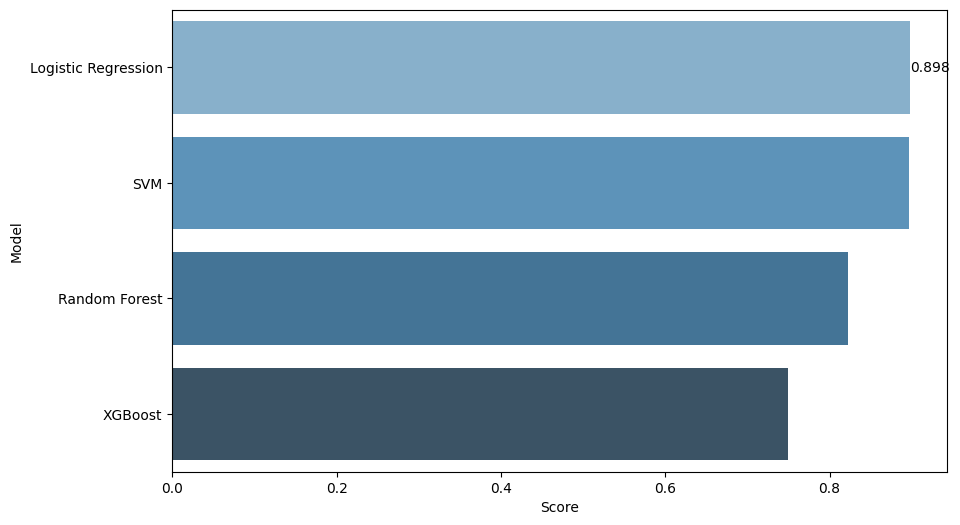

In [89]:
plt.figure(figsize=(10, 6))
compare_score = compare_score.sort_values(by="Score", ascending=False)
ax = sns.barplot(x="Score", y="Model", data=compare_score, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.show()


### Notice:
We observe that Logistic Regression achieved the best performance.
However, one idea would be instead of focusing solely on accuracy, it would be beneficial to optimize for Recall_Hispanic score, as all models show lower effectiveness in this category. Prioritizing improvements in this area could lead to a more balanced and fair model.

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [100]:
# !pip install imblearn

In [93]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [93]:
over = SMOTE(sampling_strategy={"Hispanic": 1250})
under = RandomUnderSampler(sampling_strategy={"White":2800})
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [ ]:
y_resampled.value_counts()

In [ ]:
y_train.value_counts()

#  SHAP
- http://archive.today/2024.02.04-155206/https://towardsdatascience.com/shapley-values-clearly-explained-a7f7ef22b104
- https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [100]:
# !pip install shap

In [100]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

In [ ]:
shap.summary_plot(shap_values, X_test)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___